In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [69]:
d=pd.read_csv("daily_min_temp.csv",index_col="Date",parse_dates=True)

In [70]:
d.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [71]:
d.tail()

,Temp
Date,
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5
1990-12-30,15.7
1990-12-31,13.0


In [72]:
d.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    3650 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB


In [73]:
d.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


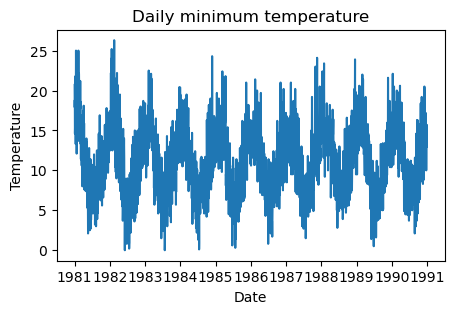

In [74]:
plt.figure(figsize=(5,3))
plt.plot(d['Temp'])
plt.title("Daily minimum temperature")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.show()

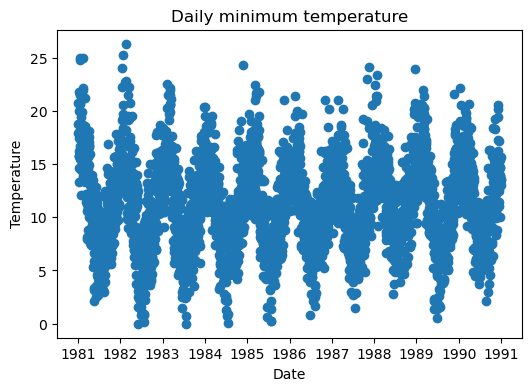

In [75]:
plt.figure(figsize=(6,4))
plt.scatter(d.index,d['Temp'])
plt.title("Daily minimum temperature")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.show()

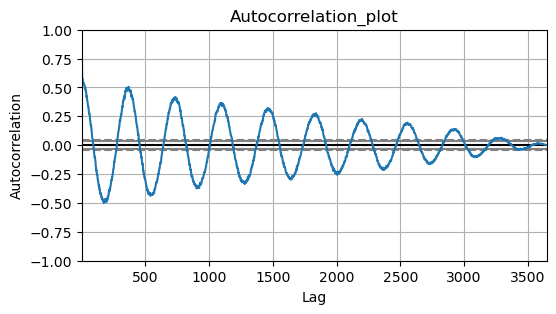

In [76]:
plt.figure(figsize=(6,3))
pd.plotting.autocorrelation_plot(d['Temp'])
plt.title("Autocorrelation_plot")
plt.show()

In [77]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(d['Temp'],order=(5,1,0))
model_fit=model.fit()
print(model_fit.summary())

C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Temp   No. Observations:                 3650
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -8495.813
Date:                Fri, 24 Jan 2025   AIC                          17003.626
Time:                        10:25:06   BIC                          17040.839
Sample:                             0   HQIC                         17016.879
                               - 3650                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3358      0.015    -22.489      0.000      -0.365      -0.307
ar.L2         -0.3911      0.016    -24.088      0.000      -0.423      -0.359
ar.L3         -0.2942      0.017    -17.026      0.0

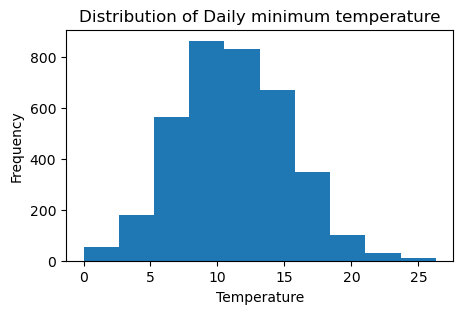

In [78]:
plt.figure(figsize=(5,3))
plt.hist(d['Temp'])
plt.title("Distribution of Daily minimum temperature")
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.show()

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


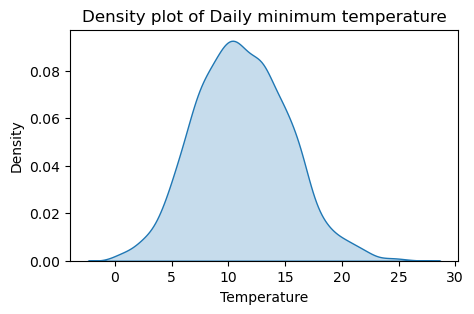

In [79]:
plt.figure(figsize=(5,3))
sns.kdeplot(d['Temp'],fill=True)
plt.title("Density plot of Daily minimum temperature")
plt.ylabel("Density")
plt.xlabel("Temperature")
plt.show()

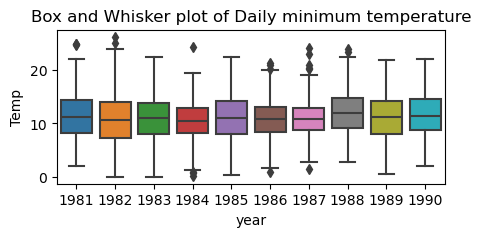

In [80]:
plt.figure(figsize=(5,2))
d['year']=d.index.year
sns.boxplot(x='year',y='Temp',data=d)
plt.title("Box and Whisker plot of Daily minimum temperature")
plt.show()

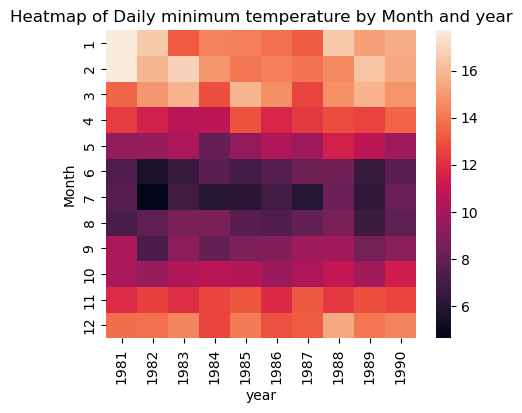

In [81]:
plt.figure(figsize=(5,4))
d['Month']=d.index.month
heatmap_d = d.pivot_table(values='Temp', index='Month', columns='year')  
sns.heatmap(heatmap_d)
plt.title("Heatmap of Daily minimum temperature by Month and year")
plt.show()